# Análise de Tópicos

<font size=5>
Análise, ou Modelagem, de Tópicos nos permite analisar grandes volumes de texto atravez de técnicas de clusterização ou agrupamento dos documentos em tópicos!
<br/>
<br/>
Grande parte dos dados disponíveis no mundo real não estão classificados e por isso não podemos aplicar as técnicas de aprendizado supervisionado que usamos anteriormente!
<br/>
<br/>

Nestes casos, onde trabalhamos com dados não classificados, podemos tentar encontrar suas classificações agrupando-os em tópicos.

  </font>




# Importante!

<font size=5>
Por não termos junto aos dados sua verdadeira classificação, nesses casos não sabemos a "resposta correta" o que torma muito difícil mensurar o quanto nosso algoritmo esta acertando ou errando!
<br/>
<br/>

Tudo que sabemos (ou assumimos) é que documentos que forem agrupados no mesmo tópico compartilham ideias similares.
<br/>
<br/>

Fica a cargo do usuário (cientista/analista de dados, eng. machine learning e etc) se os grupos formados são coerentes e o que cada grupo representa!
</font>

# LDA - Latent Dirichlet Allocation

<font size=5>
LDA ou Latent Dirichlet Allocation é um “modelo probabilístico generativo” de uma coleção composta de partes. Em termos de modelagem de tópicos, as coleções são documentos e as partes são palavras, ou frases (n-gramas). Mas você pode aplicar o LDA ao DNA e seus nucleotídeos,  moléculas e átomos, funcionários e habilidades, ou teclados e teclas.  
<br/>
<br/>
O LDA tem esse nome pois usa a Distribuição Dirichlet (do matemático alemão Johann Peter Gustav Lejeune Dirichlet) para encontrar tópicos "latentes" nos documentos.
<br/>
<br/>
Em 2003, esse método foi publicado pela primeira vez por David Blei, Andrew Ng e Michael Jordan e pode ser [lido aqui](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)
<br/>
<br/>

Para entender melhor como o método funciona recomendo a leitura do artigo original no link acima!
  
</font>



# LDA

<font size=5>
Existem algumas premissas na aplicação do LDA:
<br/>
<br/>

1.   Documentos com assuntos similares usam palavras similares<br/>
2.   Os tópicos latentes podem ser encontrados atravez dos grupos de palavras que ocorrem juntas<br/>
3.   Documentos são distribuições de probabilidade sobre os tópicos latentes<br/>
4.   Tópicos são também distribuições de probabilidade sobre as palavras<br/>

</font>

# Documentos são distribuições de probabilidade sobre os tópicos latentes

![alt text](https://i.ibb.co/C2gs3mS/doc-prob-topics.png)

# Tópicos são também distribuições de probabilidade sobre as palavras

![alt text](https://i.ibb.co/KskDmbD/topic-prob-words.png)

In [24]:
import pandas as pd

df = pd.read_csv("https://s3.amazonaws.com/automl-example/produtos.csv", 
                 delimiter=";", encoding='utf-8')

df.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Bonecos Brinquedo Vingadores 30 Cm Com Luz E...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,game
freq,20,39,1020


In [0]:
df.dropna(inplace=True)

df["texto"] = df['nome'] + " " + df['descricao']

In [26]:
df.categoria.value_counts()

livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

stops = nltk.corpus.stopwords.words('portuguese')

#vect = CountVectorizer(ngram_range=(2,2), stop_words=stops)
#vect.fit(df.texto)
#text_vect = vect.transform(df.texto)

vect = TfidfVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df.texto)
text_vect = vect.transform(df.texto)

In [30]:
text_vect.shape

(2916, 35310)

In [31]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=4,random_state=42)

LDA.fit(text_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [32]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['12', 'profissional', 'pincéis', 'sombras', 'paleta', 'rose', 'matte', 'ruby', 'cm', 'maleta', 'bonecos', 'maquiagem', 'cores', 'pincel', 'kit']


THE TOP 15 WORDS FOR TOPIC #1
['clique', 'enviar', 'produto', 'games', 'envios', 'cliente', 'gta', 'dias', 'envio', 'anúncio', 'produtos', 'entrega', 'pagamento', 'mercado', 'prazo']


THE TOP 15 WORDS FOR TOPIC #2
['ed', 'anos', 'livros', 'história', 'origem', 'mundo', 'vida', 'novo', 'ball', 'dragon', 'páginas', '00', 'produto', 'livro', 'edição']


THE TOP 15 WORDS FOR TOPIC #3
['mercado', 'escolha', 'combinar', 'sim', 'produto', 'envio', 'original', 'jogar', 'retirar', 'online', 'vendedor', 'frete', 'compra', 'digital', 'jogo']




In [33]:
results = LDA.transform(text_vect)

results.shape

(2916, 4)

In [37]:
results.argmax(axis=1)

array([2, 2, 2, ..., 3, 3, 3])

In [38]:
df['topico'] = results.argmax(axis=1)

df.head()

,nome,descricao,categoria,texto,topico
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...,2
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,Livro - It A Coisa - Stephen King Produto No...,2
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,2
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,Box Harry Potter Produto Novo e Físico A sé...,2
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,Livro Origem - Dan Brown Produto NovoDe Onde...,2


In [39]:
import numpy as np

df['categ_cod'] = df.categoria.map({'maquiagem': 0, 'game': '1', 'livro': 2, 'brinquedo':3})
df['categ_cod'] = df.categ_cod.astype(np.int64)

df.head()

,nome,descricao,categoria,texto,topico,categ_cod
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...,2,2
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,Livro - It A Coisa - Stephen King Produto No...,2,2
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,2,2
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,Box Harry Potter Produto Novo e Físico A sé...,2,2
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,Livro Origem - Dan Brown Produto NovoDe Onde...,2,2


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 4079
Data columns (total 6 columns):
nome         2916 non-null object
descricao    2916 non-null object
categoria    2916 non-null object
texto        2916 non-null object
topico       2916 non-null int64
categ_cod    2916 non-null int64
dtypes: int64(2), object(4)
memory usage: 159.5+ KB


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(df.categ_cod, df.topico))

0.5558984910836763


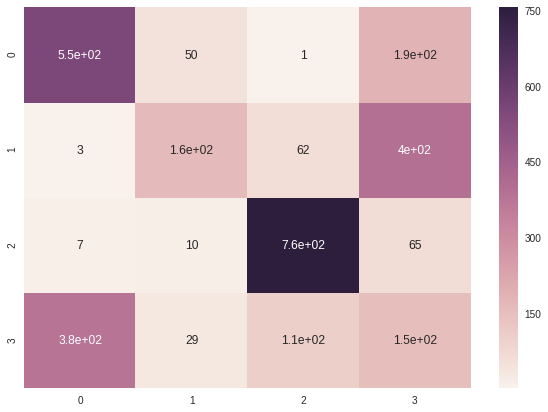

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(df.categ_cod, df.topico)

df_cm = pd.DataFrame(matrix, index=list('0123'),
                  columns=list('0123'))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

<font size=5>
<b>max_df:</b> float in range [0.0, 1.0] or int, default=1.0<br/>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

<br/>
<br/>

<b>min_df:</b> float in range [0.0, 1.0] or int, default=1<br/>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
</font>

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

stops = nltk.corpus.stopwords.words('portuguese')
stops = stops + ['entrega', 'pronta', 'anúncio', 'frete', 'produto', 'produtos',
                'envio', 'pagamento', 'mercado', 'prazo']

vect = TfidfVectorizer(ngram_range=(1,1), stop_words=stops, max_df=0.95, min_df=2)
vect.fit(df.texto)
text_vect = vect.transform(df.texto)

LDA = LatentDirichletAllocation(n_components=4,random_state=42)
LDA.fit(text_vect)


for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')


THE TOP 15 WORDS FOR TOPIC #0
['marvel', 'cm', 'led', 'tebori', 'flex', '30', 'postiços', '12', 'kit', 'gel', 'luz', 'som', 'bonecos', 'vingadores', 'cílios']


THE TOP 15 WORDS FOR TOPIC #1
['cor', 'pincéis', '10', 'rose', 'gta', 'após', 'compra', 'cliente', 'comprar', 'dias', 'maleta', 'kit', 'cores', 'maquiagem', 'pincel']


THE TOP 15 WORDS FOR TOPIC #2
['informações', 'barras', 'capa', 'ed', 'anos', 'livros', 'novo', 'origem', 'história', 'vida', 'mundo', 'páginas', 'livro', '00', 'edição']


THE TOP 15 WORDS FOR TOPIC #3
['one', 'endereço', 'horário', 'escolha', 'combinar', 'xbox', 'compra', 'sim', 'original', 'retirar', 'jogo', 'vendedor', 'online', 'jogar', 'digital']




In [45]:
results = LDA.transform(text_vect)

df['topico'] = results.argmax(axis=1)

df['categ_cod'] = df.categoria.map({'maquiagem': 1, 'game': 3, 'brinquedo': 0, 'livro':2})
df['categ_cod'] = df.categ_cod.astype(np.int64)

print(accuracy_score(df.categ_cod, df.topico))

0.5977366255144033


In [46]:
LDA.score(text_vect) // 1000

-208.0

In [47]:
LDA2 = LatentDirichletAllocation(n_components=8,random_state=42)
LDA2.fit(text_vect)

LDA2.score(text_vect) // 1000

-222.0